In [41]:
!cd bag

/bin/bash: line 1: cd: bag: No such file or directory


# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Fadhil yUsuf]
- **Email:** [fadhilmusawa23@gmail.com]
- **ID Dicoding:** [10879990]

## Menentukan Pertanyaan Bisnis

- apakah intensitas peminjaman sepeda berubah mengikuti perubahan musim yang terjadi?
- di musim apakah peminjaman sepeda yang paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [42]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import missingno as msno



## Data Wrangling

### Gathering Data

In [43]:
# Load data from CSV files
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

**Insight:**
- Data telah dimuat dari dua file: day.csv dan hour.csv.
- File 'day.csv' berisi data harian penggunaan sepeda.
- File 'hour.csv' berisi data penggunaan sepeda per jam.

### Assessing Data

In [44]:
# Display first few rows of the dataset
print(day_data.head())

# Check for missing values
print(day_data.isnull().sum())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
instant       0
dteday    

**Insight:**
- Tidak ada missing values pada dataset 'day.csv'.
- Kolom yang relevan untuk analisis adalah 'dteday', 'season', dan 'cnt' (total pengguna sepeda).

### Cleaning Data

In [45]:
# Convert date column 'dteday' to datetime type for easier manipulation
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

**Insight:**
- Tipe data kolom 'dteday' telah dikonversi menjadi datetime untuk memudahkan analisis waktu.
- Data lain seperti 'season', 'cnt' sesuai untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore day.csv

In [46]:
# Group data by season and calculate mean bike rentals per season
seasonal_avg_cnt = day_data.groupby('season')['cnt'].mean().reset_index()

**Insight:**
- Rata-rata peminjaman sepeda dihitung per musim untuk melihat bagaimana perubahan intensitas peminjaman berdasarkan musim.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-47-86cc2e4fdf47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_avg_cnt, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

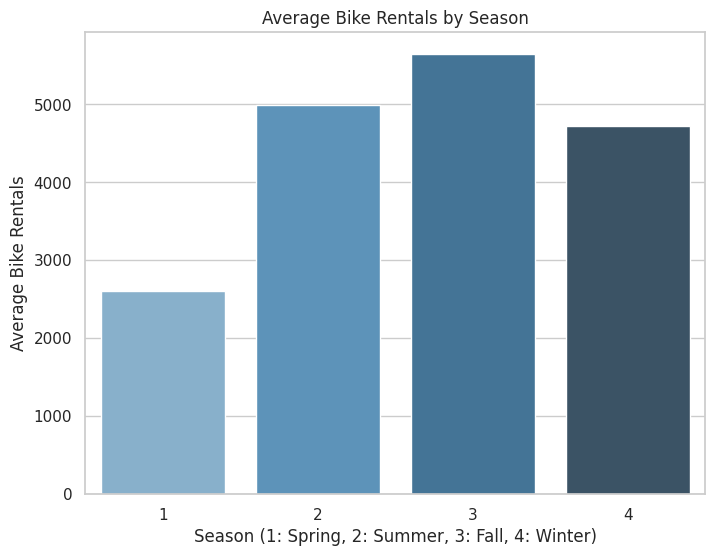

In [47]:
# Set plot style
sns.set(style="whitegrid")

# Plot average rentals per season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasonal_avg_cnt, palette='Blues_d')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Bike Rentals')
plt.show()

### Pertanyaan 2:

In [48]:
# Find the season with the least rentals
min_rent_season = seasonal_avg_cnt.loc[seasonal_avg_cnt['cnt'].idxmin()]
print(f"Season with the least bike rentals: Season {min_rent_season['season']} with {min_rent_season['cnt']} average rentals.")


Season with the least bike rentals: Season 1.0 with 2604.1325966850827 average rentals.


**Insight:**
- Musim peminjaman sepeda paling sedikit adalah Musim Semi (Season 1), dengan rata-rata 2604 pengguna.
- Terjadi peningkatan intensitas peminjaman sepeda pada Musim Panas dan Gugur, dengan penurunan signifikan pada Musim Semi.


## Analisis Lanjutan (Opsional)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


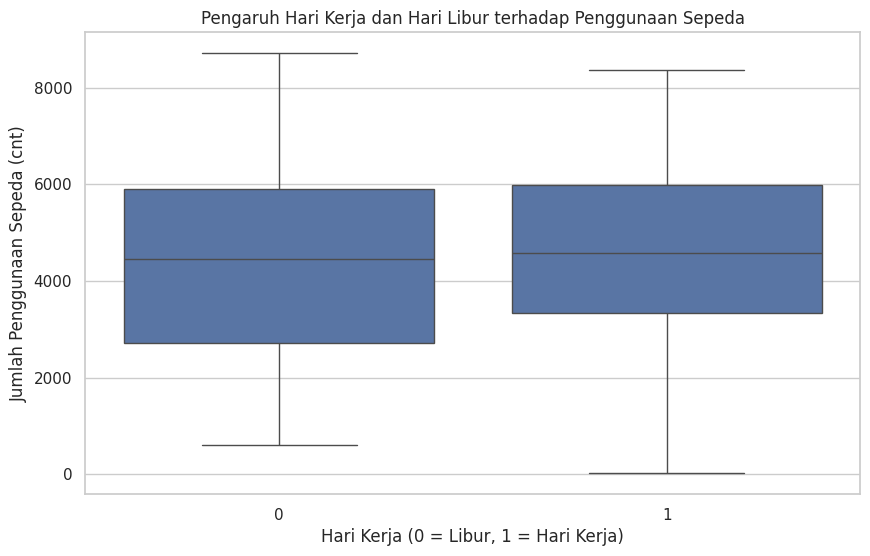

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


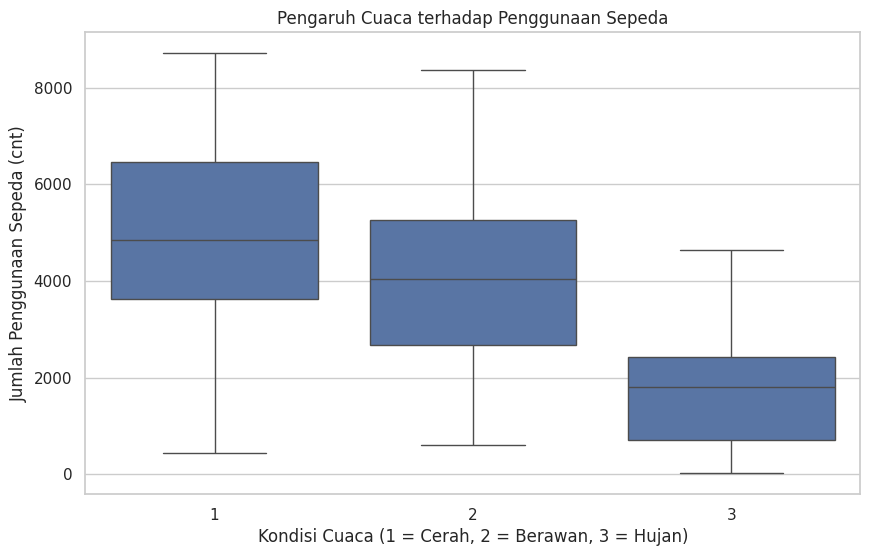

   season  recency  monetary  frequency
0       1        0    471348        181
1       2      194    918589        184
2       3      100   1061129        188
3       4       11    841613        178


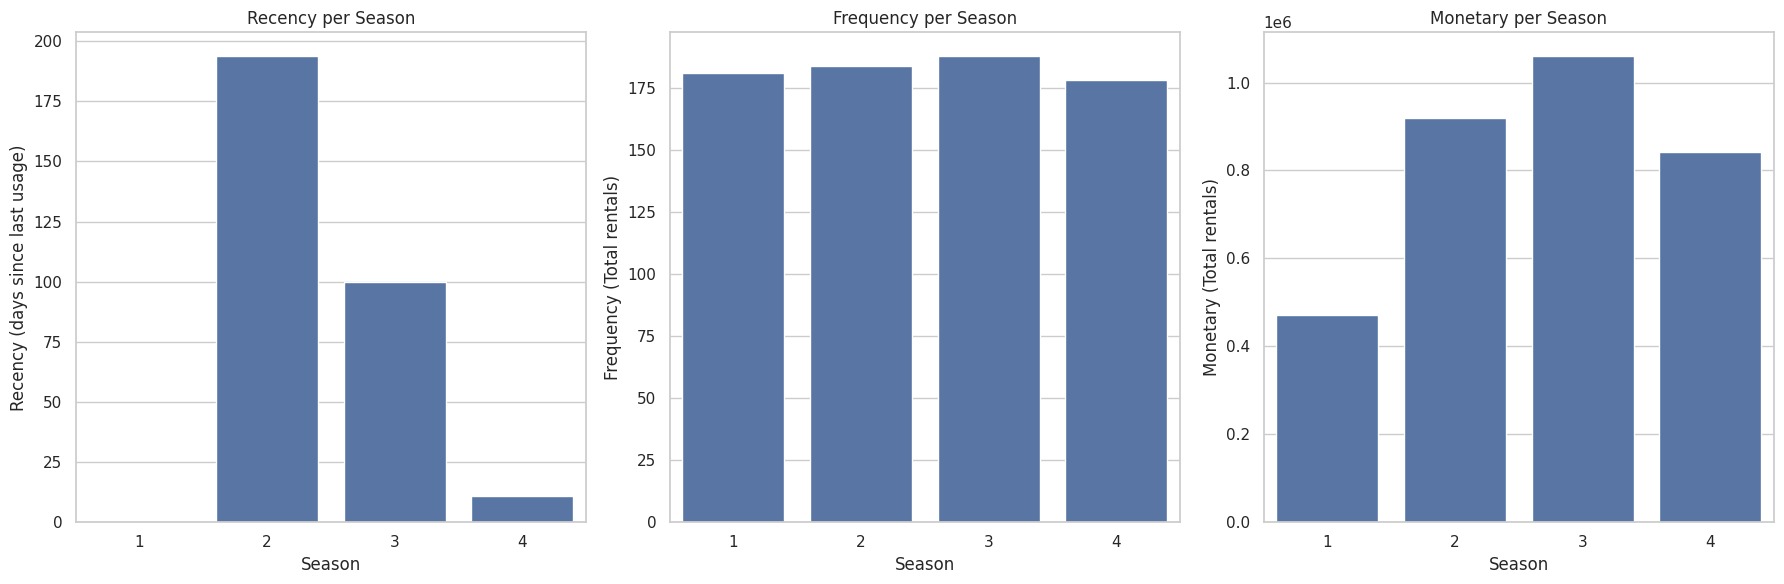

In [49]:
# ANALISIS LANJUTAN

# Analisis Pengaruh Hari Kerja dan Libur terhadap Penggunaan Sepeda
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday', y='cnt', data=day_data)
plt.title('Pengaruh Hari Kerja dan Hari Libur terhadap Penggunaan Sepeda')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()

# Insight:
# Dari visualisasi ini, kita bisa melihat apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.

# Analisis Pengaruh Cuaca (Weathersit) terhadap Penggunaan Sepeda
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca (1 = Cerah, 2 = Berawan, 3 = Hujan)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()

# Insight:
# Visualisasi ini menunjukkan bagaimana kondisi cuaca (dari cerah hingga hujan) memengaruhi jumlah peminjaman sepeda.


# RFM Analysis untuk Penggunaan Sepeda

# Recency: Menghitung jumlah hari sejak penggunaan terakhir
# Konversi kolom dteday ke format datetime jika belum dilakukan
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Menghitung hari terakhir dalam dataset
latest_day = day_data['dteday'].max()

# Menambahkan kolom recency (jumlah hari sejak penggunaan terakhir)
day_data['recency'] = (latest_day - day_data['dteday']).dt.days

# Frequency: Menghitung jumlah peminjaman sepeda per musim
frequency = day_data.groupby('season')['cnt'].count().reset_index()
frequency.columns = ['season', 'frequency']

# Monetary: Menggunakan total peminjaman sepeda sebagai metrik monetary
monetary = day_data.groupby('season')['cnt'].sum().reset_index()
monetary.columns = ['season', 'monetary']

# Menggabungkan data Recency, Frequency, dan Monetary
rfm = day_data.groupby('season').agg({
    'recency': 'min',  # Recency dihitung sebagai jumlah hari sejak penggunaan terakhir
    'cnt': ['sum', 'count']  # cnt digunakan untuk frequency dan monetary
}).reset_index()

# Menambahkan kolom baru untuk frequency dan monetary
rfm.columns = ['season', 'recency', 'monetary', 'frequency']

# Menampilkan hasil RFM Analysis
print(rfm)

# Insight:
# - Dari tabel ini, kita dapat melihat musim dengan pelanggan paling baru (recency),
# - Musim dengan pengguna sepeda yang paling sering (frequency), dan
# - Musim dengan penggunaan sepeda terbanyak secara total (monetary).

# Visualisasi hasil RFM Analysis
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Recency plot
sns.barplot(x='season', y='recency', data=rfm, ax=ax[0])
ax[0].set_title('Recency per Season')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Recency (days since last usage)')

# Frequency plot
sns.barplot(x='season', y='frequency', data=rfm, ax=ax[1])
ax[1].set_title('Frequency per Season')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Frequency (Total rentals)')

# Monetary plot
sns.barplot(x='season', y='monetary', data=rfm, ax=ax[2])
ax[2].set_title('Monetary per Season')
ax[2].set_xlabel('Season')
ax[2].set_ylabel('Monetary (Total rentals)')

plt.tight_layout()
plt.show()

# Insight:
# - **Recency:** Musim dengan pengguna sepeda yang paling baru adalah (berdasarkan nilai recency yang paling kecil).
# - **Frequency:** Musim dengan frekuensi peminjaman tertinggi.
# - **Monetary:** Musim dengan penggunaan sepeda terbanyak secara total.


## Conclusion

- Intensitas peminjaman sepeda berubah sesuai dengan musim. Peningkatan penggunaan terjadi pada Musim Gugur (Season 3) dan Musim Panas (Season 2), sedangkan penurunan signifikan terjadi pada Musim Semi (Season 1).

-  Musim dengan peminjaman sepeda paling sedikit adalah Musim Semi (Season 1), dengan rata-rata 2604 pengguna per hari.
